In [1]:
import psnr, rmse, fsim, vif
from utils import load_data
import matplotlib.pyplot as plt
from skimage.filters import gaussian

In [2]:
file_path_img_r = '../../samples/Catec_Two_PlateIQI_20um/Catec_Two_PlateIQI_20um_1620proj_220kV_Rayscan-SimCT_800x800x1000_16bit.raw'
file_path_img_m = '../../samples/Catec_Two_PlateIQI_20um/Catec_Two_PlateIQI_20um_810proj_220kV_Rayscan-SimCT_800x800x1000_16bit.raw'

img_r = load_data(file_path_img_r)
img_m = load_data(file_path_img_m)

In [3]:
img_r.shape

(1000, 800, 800)

In [4]:
metric_psnr_m = psnr.PSNR(data_range=255)
metric_psnr_m.score(img_r, img_m)
metric_psnr_m.score_val

29.864751471369047

In [5]:
metric_rmse_m = rmse.RMSE()
metric_rmse_m.score(img_r, img_m)
metric_rmse_m.score_val

8.190352751683772

In [6]:
metric_fsim_m = fsim.FSIM(data_range=255, chromatic=False)
metric_fsim_m.score(img_r[200:400, 200:400, 200:400], img_m[200:400, 200:400, 200:400])
metric_fsim_m.score_val

tensor(0.8724, dtype=torch.float64)

In [7]:
metric_vifp_m = vif.VIFp(data_range=255, sigma_n_sq=3.2)
metric_vifp_m.score(img_r[200:400, 200:400, 200:400], img_m[200:400, 200:400, 200:400])
metric_vifp_m.score_val

tensor(0.1348, dtype=torch.float64)

In [8]:
img_gf = gaussian(img_r, sigma=3, truncate=3.5)

In [9]:
metric_psnr_gf = psnr.PSNR(data_range=255)
metric_psnr_gf.score(img_r, img_gf)
metric_psnr_gf.score_val

22.90250253601759

In [10]:
metric_rmse_gf = rmse.RMSE()
metric_rmse_gf.score(img_r, img_gf)
metric_rmse_gf.score_val

18.256396259070247

In [11]:
metric_fsim_gf = fsim.FSIM(data_range=255, chromatic=False)
metric_fsim_gf.score(img_r[200:400, 200:400, 200:400], img_m[200:400, 200:400, 200:400])
metric_fsim_gf.score_val

tensor(0.8724, dtype=torch.float64)

In [12]:
metric_vifp_gf = vif.VIFp(data_range=255, sigma_n_sq=3.2)
metric_vifp_gf.score(img_r[200:400, 200:400, 200:400], img_m[200:400, 200:400, 200:400])
metric_vifp_gf.score_val

tensor(0.1348, dtype=torch.float64)

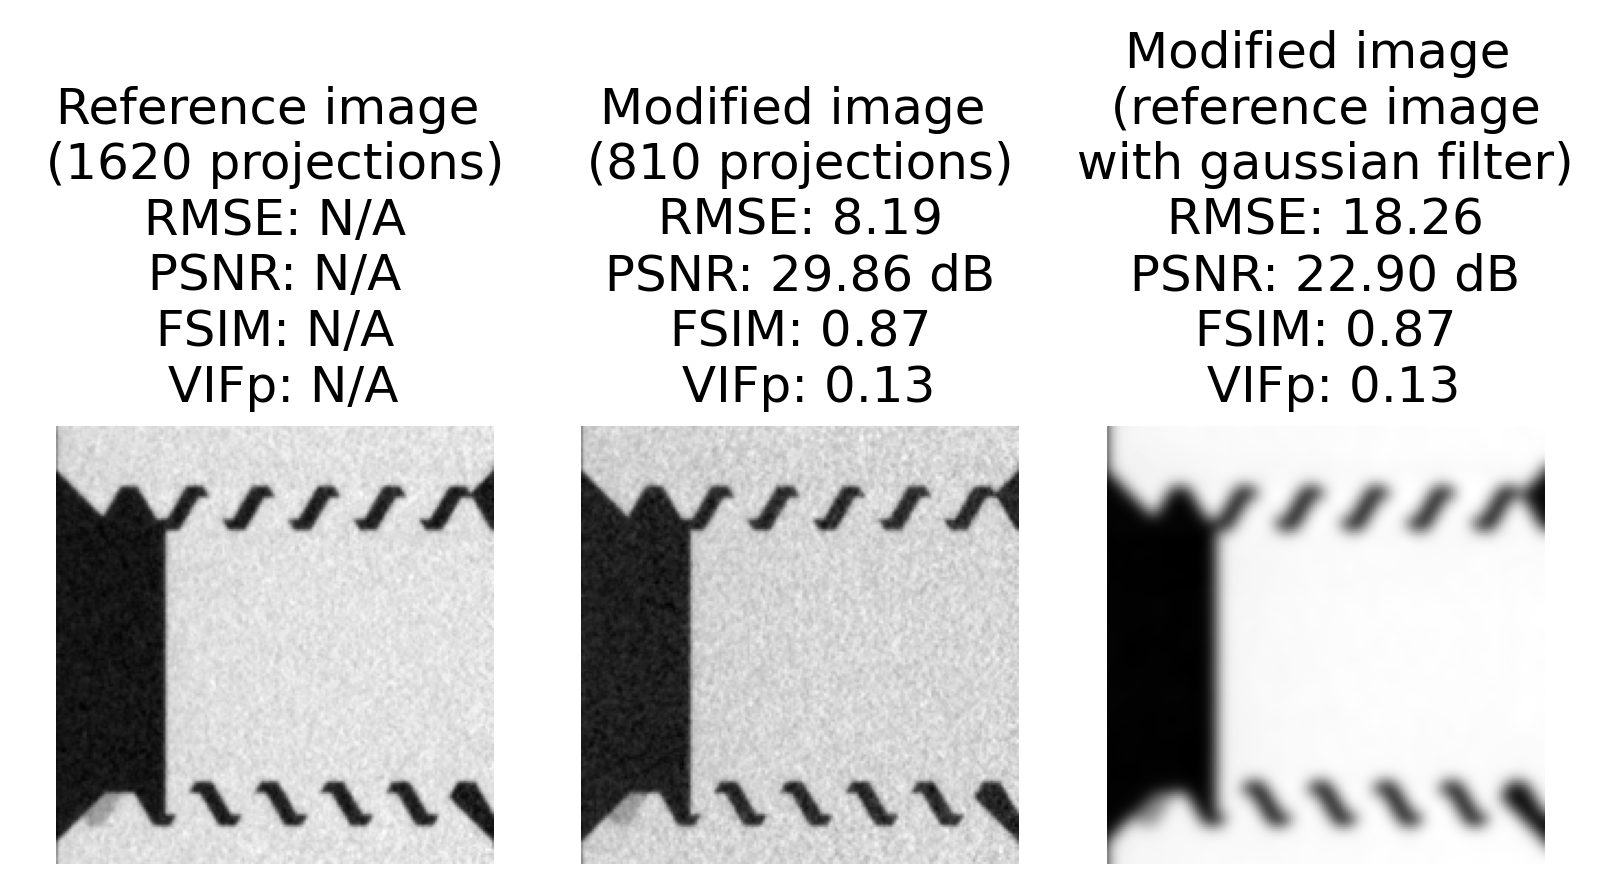

In [23]:
fig, axs = plt.subplots(1,3, dpi=300)
axs[0].imshow(img_r[200:400,400,200:400], cmap="gray")
axs[1].imshow(img_m[200:400,400,200:400], cmap="gray")
axs[2].imshow(img_gf[200:400,400,200:400], cmap="gray")

axs[0].set_title(f'Reference image \n (1620 projections) \n RMSE: N/A \n PSNR: N/A \n FSIM: N/A \n VIFp: N/A')
axs[1].set_title(f'Modified image \n (810 projections) \n RMSE: {metric_rmse_m.score_val:.2f} \n PSNR: {metric_psnr_m.score_val:.2f} dB \n FSIM: {metric_fsim_m.score_val:.2f} \n VIFp: {metric_vifp_m.score_val:.2f}')
axs[2].set_title(f'Modified image \n (reference image \n with gaussian filter) \n RMSE: {metric_rmse_gf.score_val:.2f} \n PSNR: {metric_psnr_gf.score_val:.2f} dB \n FSIM: {metric_fsim_gf.score_val:.2f} \n VIFp: {metric_vifp_gf.score_val:.2f}')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off');

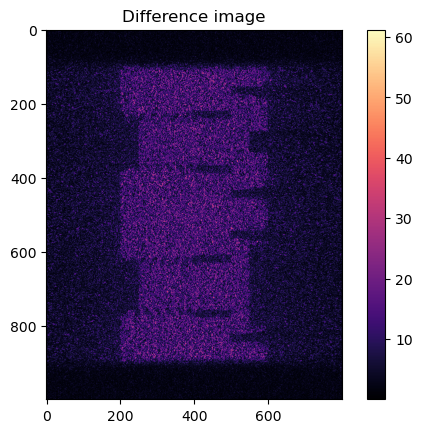

In [14]:
diff = abs(img_r - img_m)
fig, ax = plt.subplots()
pos = ax.imshow(diff[:,400,:], cmap="magma")
fig.colorbar(pos, ax=ax)
ax.set_title('Difference image');

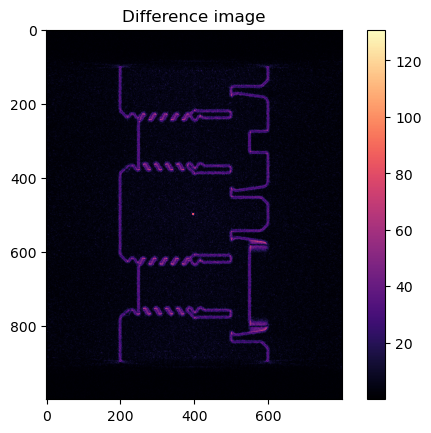

In [15]:
diff = abs(img_r - img_gf)
fig, ax = plt.subplots()
pos = ax.imshow(diff[:,400,:], cmap="magma")
fig.colorbar(pos, ax=ax)
ax.set_title('Difference image');